# EDA with Python and applying Logistic Regression 
Here, I will be working with the Titanic Data Set from Kaggle. This is a very famous data set!

I've tried to predict a classification-survival or deceased. Let's begin the understanding of implementing Logistic Regression in Python for classification.

## Import Libraries
Let's import some libraries to get started...

In [1]:
import pandas as pd
import numpy as npm
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Titanic Dataset with Pandas

To read the Titanic dataset using Pandas in Python, we can use the `read_csv()` function. Here's how to do it :


In [2]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

# Exploratory Data Analysis 
Now we are going to do some exploratory data analysis! 

# Missing Data
We can use seaborn to cretae a simple heatmap to see where are missing data!

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

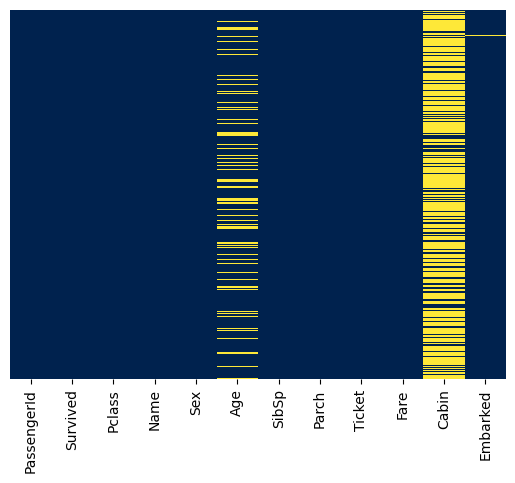

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="cividis")

Around 20 percent of Age data is missing. When we look at the heatmap of our dataframe the Age column looks less missing than the Cabin one. Cabin column looks like we are just missing too much of the data to do something useful with a basic level. We'll probably drop this later, or change it to another feature like 'Cabin Known : 1 or 0'.

Let's continue onby visualizing some more of the data :

## To create a countplot of the 'Survived' column using Seaborn with the 'whitegrid' style:


<Axes: xlabel='Survived', ylabel='count'>

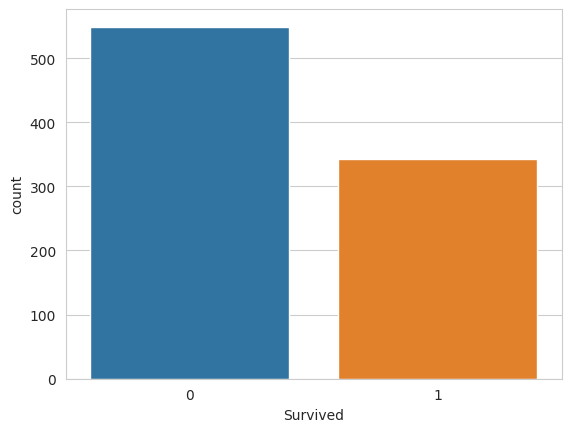

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

## To create a countplot of the 'Survived' column based on gender using Seaborn with the 'whitegrid' style and the 'RdBu_r' color palette:

<Axes: xlabel='Survived', ylabel='count'>

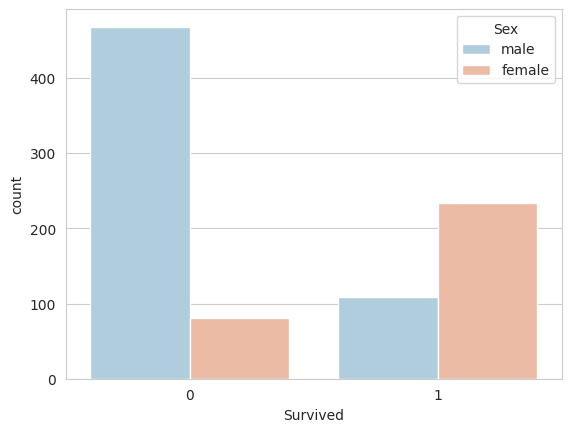

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df,hue="Sex",palette= "RdBu_r")

## To create a countplot of the 'Survived' column based on passenger class using Seaborn with the 'whitegrid' style and the 'rainbow' color palette:

<Axes: xlabel='Survived', ylabel='count'>

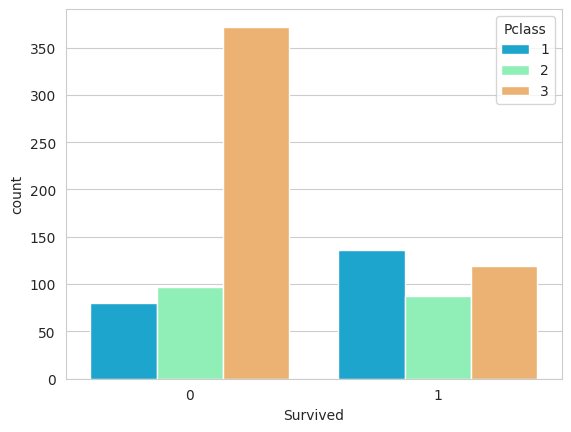

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df,palette="rainbow")

## Here I am using a displot to make a histogram of the 'Age' column without kernel density estimation (KDE) using Seaborn:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


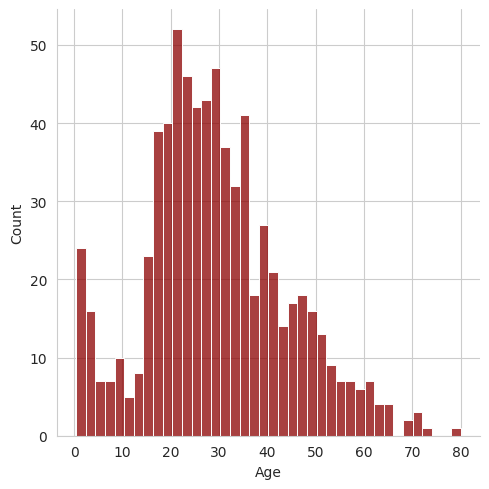

In [10]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

## We here find out the Sibling and Spouse counts using bar plot :

<Axes: xlabel='SibSp', ylabel='count'>

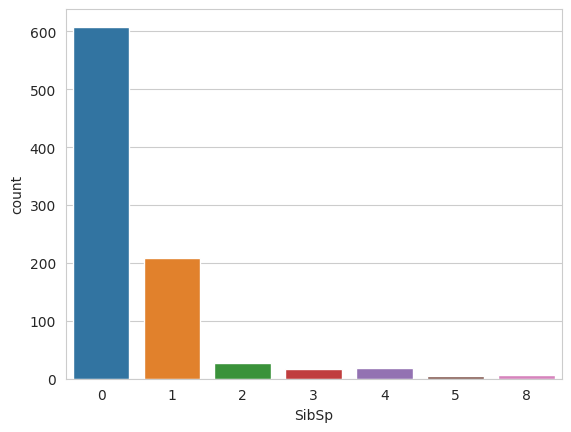

In [11]:
sns.countplot(x="SibSp",data=df)

## A histogram of the 'Fare' column using Pandas:


<Axes: >

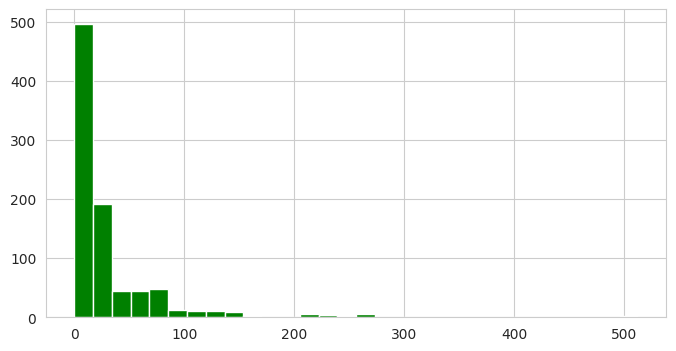

In [12]:
df['Fare'].hist(color='green',bins=30,figsize=(8,4))

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

### A boxplot showing the distribution of ages across different passenger classes using Seaborn:

<Axes: xlabel='Pclass', ylabel='Age'>

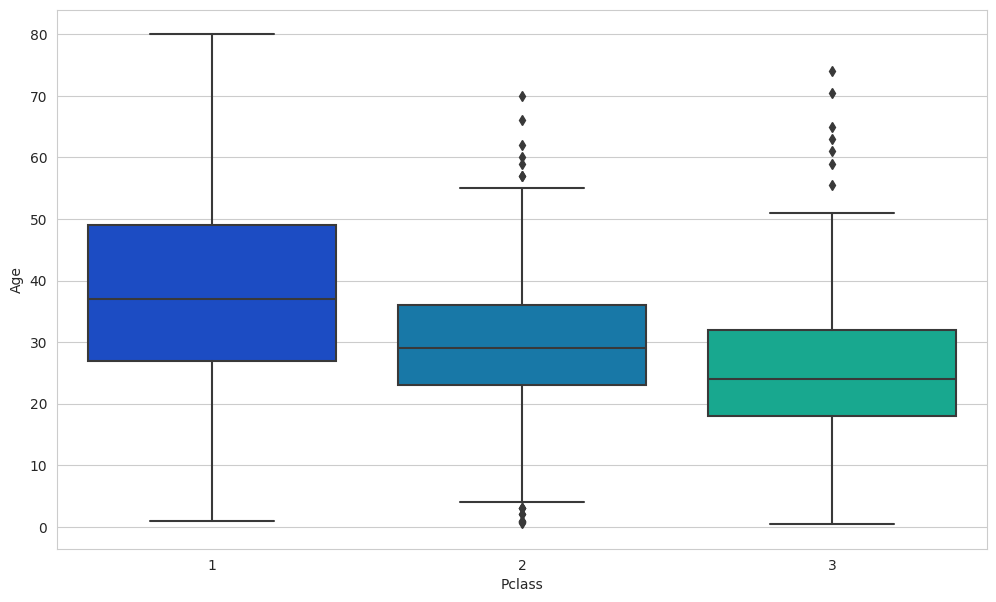

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
            
        elif Pclass == 2:
                return 29
            
        else:
                return 24
    else :
                return Age

Now we apply that function!

In [15]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

/tmp/ipykernel_18/2913033554.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_18/2913033554.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

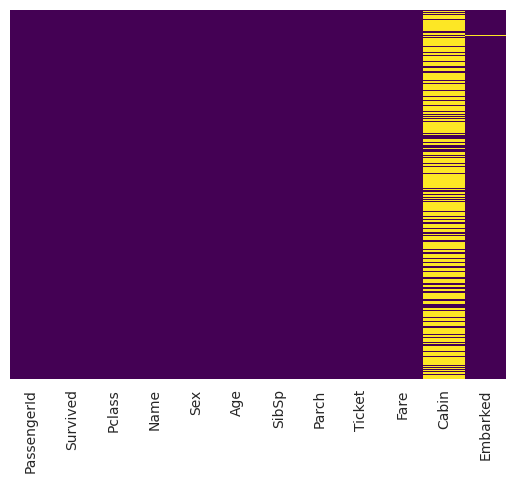

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Let's go ahead and drop the Cabin column.

In [17]:
df.drop('Cabin',axis=1,inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now check let's check the heatmap again.

<Axes: >

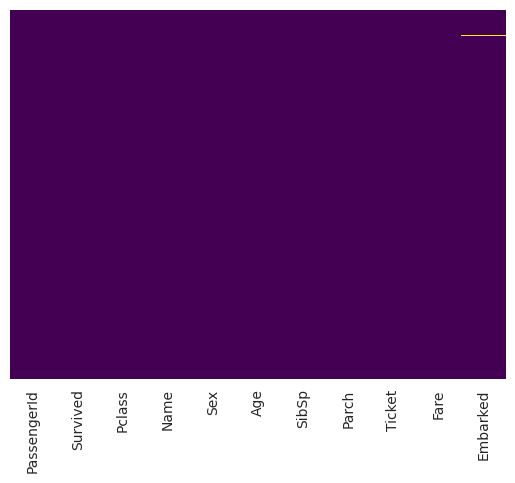

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
pd.get_dummies(df['Embarked'],drop_first=True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
sex = pd.get_dummies(df["Sex"],drop_first=True).astype(int)
embark = pd.get_dummies(df["Embarked"],drop_first=True).astype(int)

In [23]:
df.drop(["Sex","Name","Embarked","Ticket"],axis=1,inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
df = pd.concat([df,sex,embark],axis=1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model
let's start by splitting our data into a training set and test set.

In [27]:
df.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [28]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

# Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [33]:
predictions = logmodel.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
accuracy = confusion_matrix(y_test,predictions)

In [36]:
accuracy

array([[134,  20],
       [ 38,  76]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7835820895522388

In [39]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

# Evaluation
We can check precision,recall,f1-score using classification report!

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

